<a href="https://colab.research.google.com/github/h4r1c0t/WildCodeSchool/blob/master/LiveCoding/%2314_dummification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier


sns.set()

In [0]:
df_diamonds = pd.read_csv(url)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [0]:
df_diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


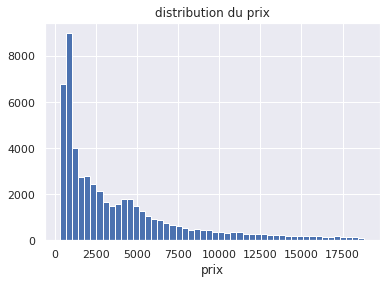

In [0]:
plt.hist(df_diamonds['price'], bins = 50)
plt.xlabel('prix')
plt.title('distribution du prix')
plt.show()

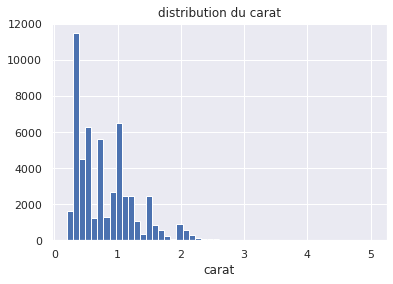

In [0]:
plt.hist(df_diamonds['carat'], bins = 50)
plt.xlabel('carat')
plt.title('distribution du carat')
plt.show()

In [0]:
cat_var = []

for col in df_diamonds.columns:
  if df_diamonds[col].dtype == 'object':
    cat_var.append(col)
    print(col, df_diamonds[col].nunique())

print(cat_var)

cut 5
color 7
clarity 8
['cut', 'color', 'clarity']


In [0]:
for cat in cat_var:
  print(df_diamonds.groupby(cat).count()['carat'])

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: carat, dtype: int64
color
D     6775
E     9797
F     9542
G    11292
H     8304
I     5422
J     2808
Name: carat, dtype: int64
clarity
I1        741
IF       1790
SI1     13065
SI2      9194
VS1      8171
VS2     12258
VVS1     3655
VVS2     5066
Name: carat, dtype: int64


In [0]:
cols_to_keep = ['carat', 'cut', 'price']
df_small = df_diamonds[cols_to_keep]

In [0]:
df_small.head()

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


Dummification

In [0]:
df_new = pd.concat([df_small,\
                    pd.get_dummies(df_small['cut'], prefix='cut', prefix_sep='_')], axis=1)
df_new.head()

,carat,cut,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,326,0,0,1,0,0
1,0.21,Premium,326,0,0,0,1,0
2,0.23,Good,327,0,1,0,0,0
3,0.29,Premium,334,0,0,0,1,0
4,0.31,Good,335,0,1,0,0,0


In [0]:
X = df_new[['carat', 'cut_Good',	'cut_Ideal',	'cut_Premium', 'cut_Very Good']]
y = df_new['price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
linreg = LinearRegression()

In [0]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = linreg.predict(X_test)

In [0]:
mean_squared_error(y_test, y_pred)

2247572.0929855634

In [0]:
r2_score(y_test, y_pred)

0.8560428745416027

In [0]:
mean_absolute_error(y_test, y_pred)

985.905657402341

Avec labelencoder

In [0]:
df_small.head()

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


In [0]:
le = preprocessing.LabelEncoder()

In [0]:
le.fit()

LabelEncoder()

In [0]:
le.transform(df_small['cut'])

array([2, 3, 1, ..., 4, 3, 2])

In [0]:
df_small.loc[:, 'le_cut'] = le.transform(df_small['cut'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
df_small

,carat,cut,price,le_cut
0,0.23,Ideal,326,2
1,0.21,Premium,326,3
2,0.23,Good,327,1
3,0.29,Premium,334,3
4,0.31,Good,335,1
...,...,...,...,...
53935,0.72,Ideal,2757,2
53936,0.72,Good,2757,1
53937,0.70,Very Good,2757,4
53938,0.86,Premium,2757,3


In [0]:
X = df_small[['carat', 'le_cut']]
y = df_small['price']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
clf = DecisionTreeClassifier(random_state=0)

In [0]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
y_pred = clf.predict(X_test)

In [0]:
r2_score(y_test, y_pred)

0.7609462740754824

In [0]:
mean_absolute_error(y_test, y_pred)

1020.1538677602382

In [0]:
linreg2 = LinearRegression()
linreg2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = linreg2.predict(X_test)
print(r2_score(y_test, y_pred), mean_absolute_error(y_test, y_pred))

0.8491947974442672 1006.3306451972959
